In [1]:
import chess
import time
from IPython.display import display, Image, clear_output

In [2]:
# Define Styles
from IPython.core.display import HTML

with open('style.css', 'r') as file:
    css = file.read()
HTML(css)

This makes it possible to not run chess core again from the benchmarking notebook

In [3]:
try:
    if RUN_CHESS_CORE:
        %run chess_core.ipynb
except NameError:
    %run chess_core.ipynb

In [4]:
start_time = time.time()

## Override depth
Possiblity to override the depth for all tests. This can be useful for performance testing (set to 4 or 5 depending on how much time you have)

In [5]:
try:
    if OVERRIDE_DEPTH:
        pass
except NameError:
    OVERRIDE_DEPTH = None

In [6]:
"""Gets a board, prints it, performs a move with the given depth, prints the board and returns it and the move"""

def perform_move(board, depth, no_overriding=False):
    display(board)
    if OVERRIDE_DEPTH and not no_overriding:
        depth = OVERRIDE_DEPTH
    val, move = minimax_input(board, depth)
    board.push(move)
    display(board)
    print("value:", val)
    return board, move

# Tests for checkmate in one move

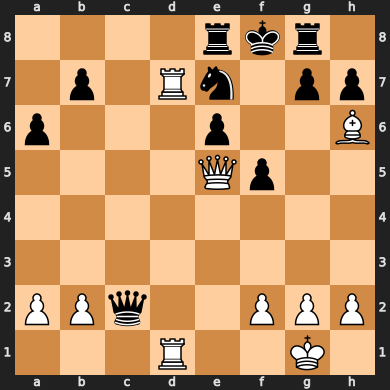

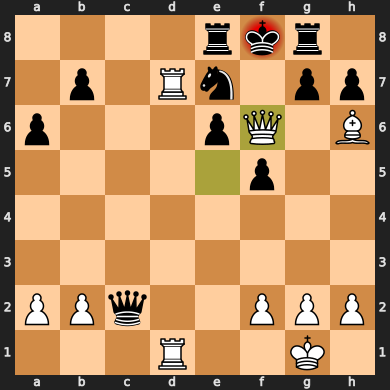

value: 2147483646
Wall time: 880 ms


In [7]:
%%time
board = chess.Board("4rkr1/1p1Rn1pp/p3p2B/4Qp2/8/8/PPq2PPP/3R2K1 w KQkq - 0 1")
board, _ = perform_move(board, 2)
assert board.is_checkmate()

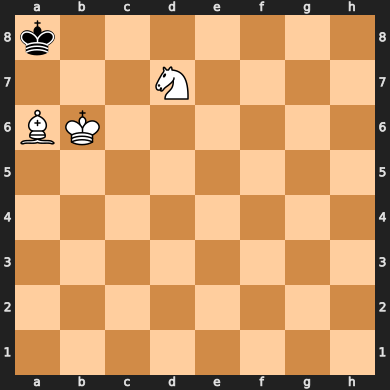

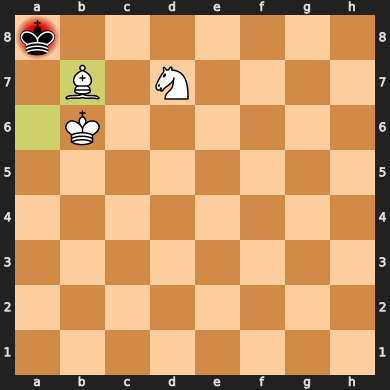

value: 2147483646
Wall time: 393 ms


In [8]:
%%time
board = chess.Board("k7/3N4/BK6/8/8/8/8/8 w KQkq - 0 1")
board, _ = perform_move(board, 3)
assert board.is_checkmate()

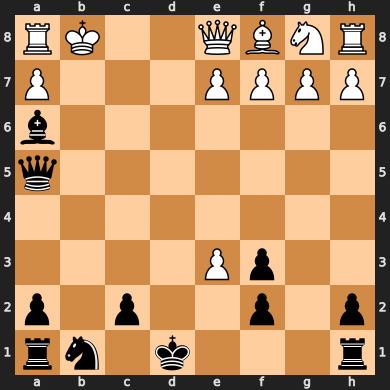

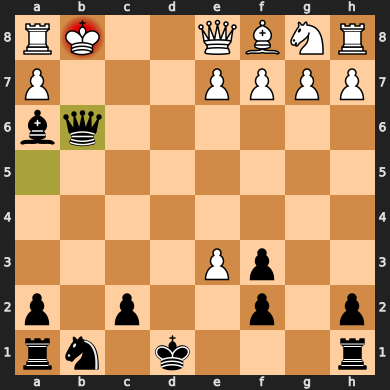

value: 2147483645
Wall time: 2.06 s


In [9]:
%%time
board = chess.Board("RK2QBNR/P3PPPP/b7/q7/8/4Pp2/p1p2p1p/rn1k3r b KQkq - 0 1")
board, _ = perform_move(board, 3)
assert board.is_checkmate()

# Tests for checkmate in two moves

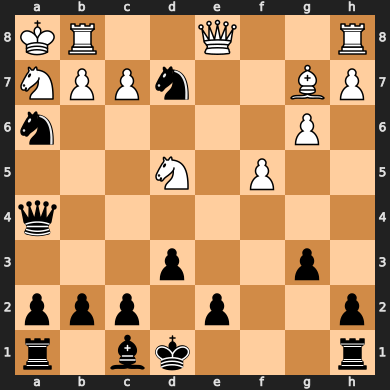

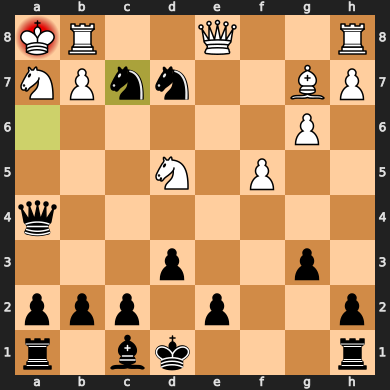

value: 2147483644


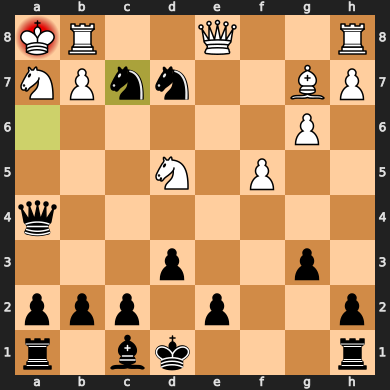

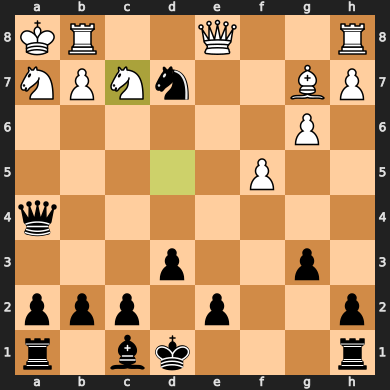

value: -2147483644


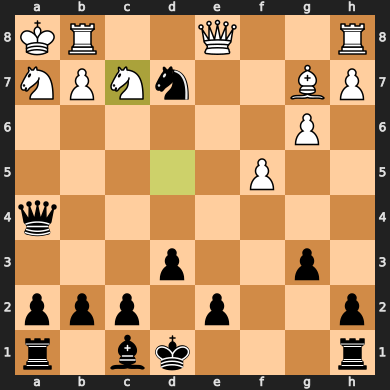

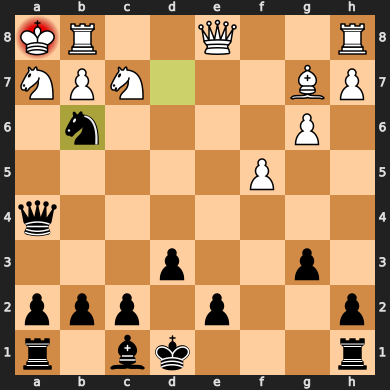

value: 2147483644
Wall time: 6.51 s


In [10]:
%%time
board = chess.Board("KR2Q2R/NPPn2BP/n5P1/3N1P2/q7/3p2p1/ppp1p2p/r1bk3r b KQkq - 0 1")
board,_ = perform_move(board,3)
board,_ = perform_move(board,3)
board,_ = perform_move(board,3)
assert board.is_checkmate()

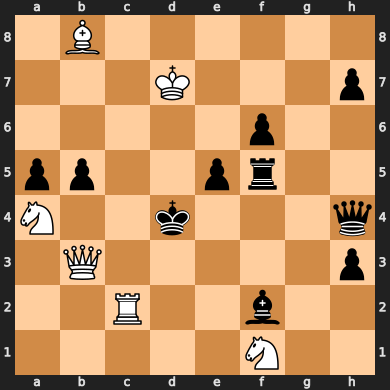

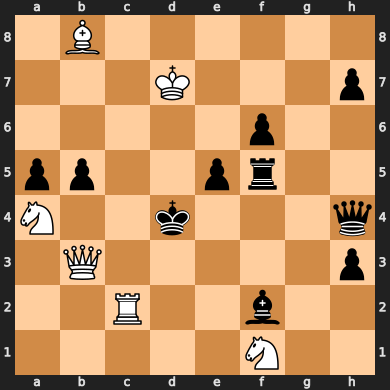

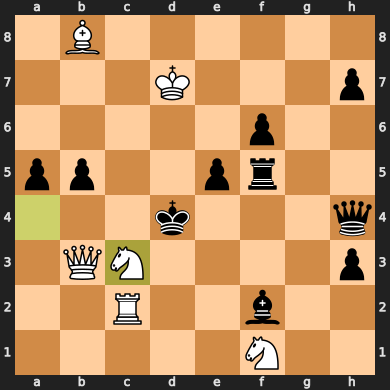

value: 2147483645


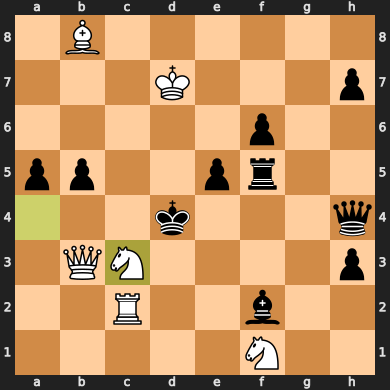

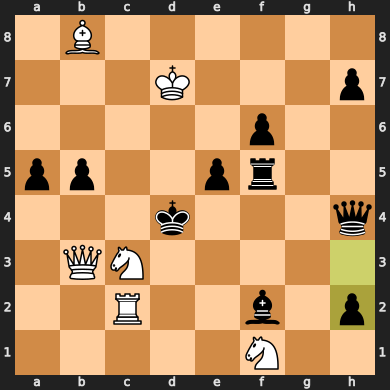

value: -2147483645


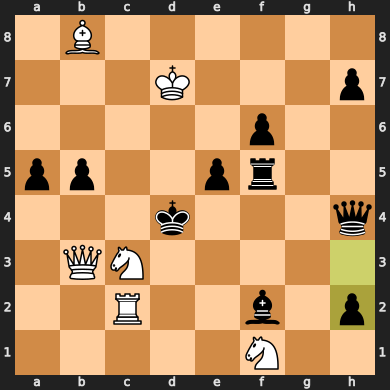

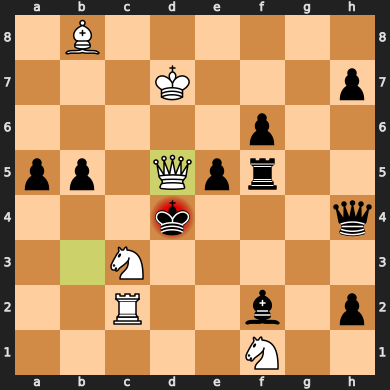

value: 2147483645
Wall time: 9 s


In [11]:
%%time
board = chess.Board("1B6/3K3p/5p2/pp2pr2/N2k3q/1Q5p/2R2b2/5N2 w KQkq - 0 1")
display(board)
board,_ = perform_move(board,3)
board,_ = perform_move(board,3)
board,_ = perform_move(board,3)
assert board.is_checkmate()

# Tests for correct moves

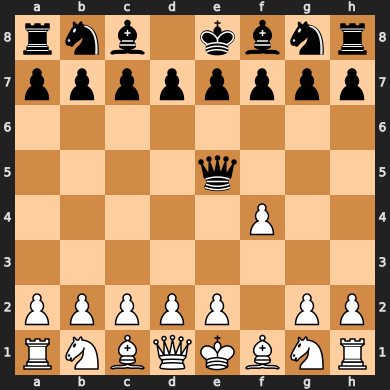

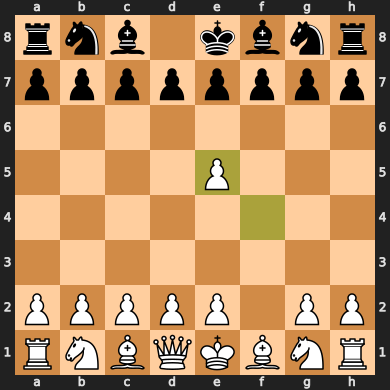

value: 860
Wall time: 491 ms


In [12]:
%%time
board = chess.Board("rnb1kbnr/pppppppp/8/4q3/5P2/8/PPPPP1PP/RNBQKBNR w KQkq - 0 1")
board,move = perform_move(board,2)
assert str(move) == "f4e5"

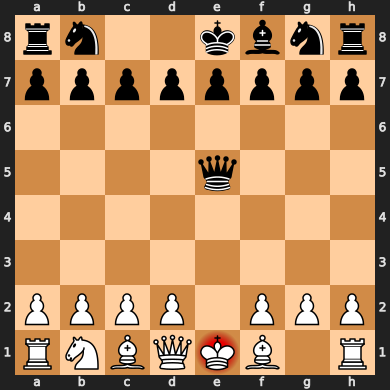

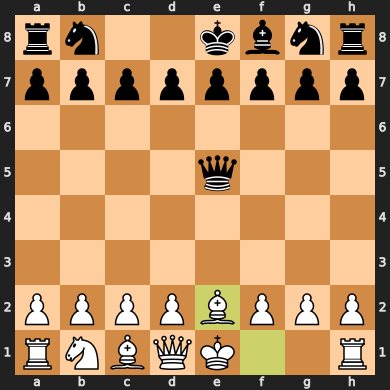

value: -365
Wall time: 121 ms


In [13]:
%%time
board = chess.Board("rn2kbnr/pppppppp/8/4q3/8/8/PPPP1PPP/RNBQKB1R w KQkq - 0 1")
board,move = perform_move(board,2)
assert str(move) == "f1e2" or str(move) == "d1e2"

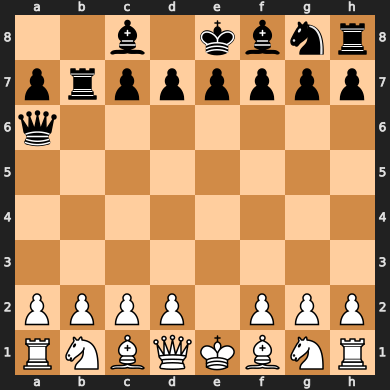

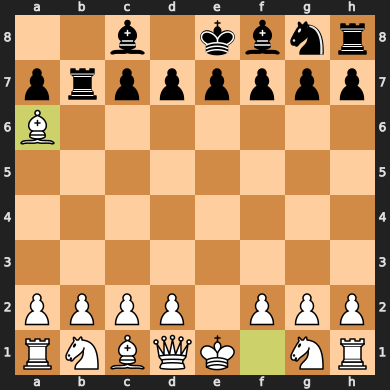

value: 1205


In [14]:
board = chess.Board("2b1kbnr/prpppppp/q7/8/8/8/PPPP1PPP/RNBQKBNR w KQk - 0 1")
board,move = perform_move(board,4)
assert str(move) == "f1a6"

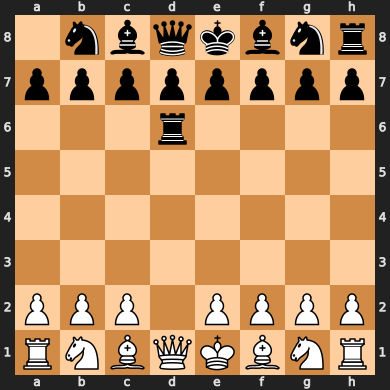

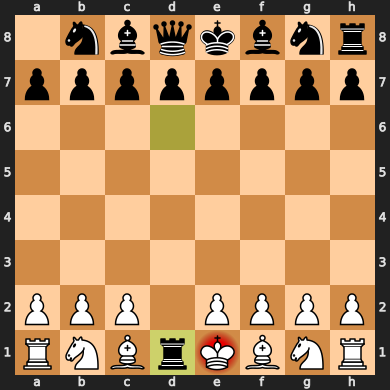

value: 475


In [15]:
board = chess.Board("1nbqkbnr/pppppppp/3r4/8/8/8/PPP1PPPP/RNBQKBNR b KQk - 0 1")
board,move = perform_move(board,4)
assert str(move) == "d6d1"

This test triggers a hash collision with `1nbqkbnr/pppppppp/3r4/8/8/8/PPP1PPPP/RNBQKBNR b KQk - 0 1` in moves 2 and 3. That is why they are commented out. Otherwise the tests would fail if executed with zobrist hash from [benchmark](./benchmark.ipynb). This is also the reason why the zobrist hash is not used by default anymore.

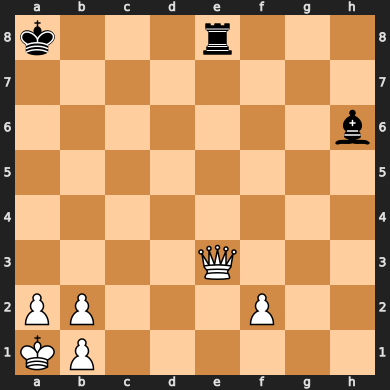

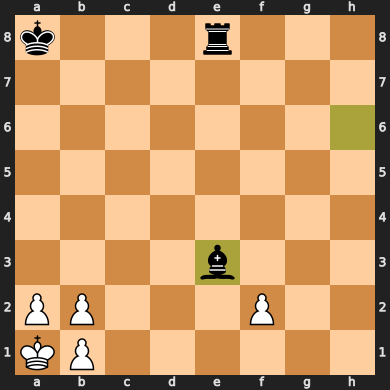

value: 210
Wall time: 4.54 s


In [16]:
%%time
board = chess.Board("k3r3/8/7b/8/8/4Q3/PP3P2/KP6 b - - 0 1")
board,move = perform_move(board,5)
assert str(move) == "h6e3"

#board,move = perform_move(chess.Board("k3r3/8/8/8/8/4b3/PP3P2/KP6 w - - 0 1"),4)
#assert str(move) == "f2e3"

#board,move = perform_move(board,4)
#assert str(move) == "e8e3"

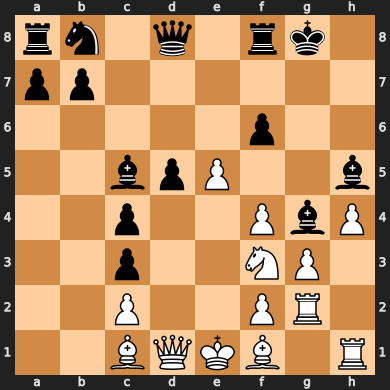

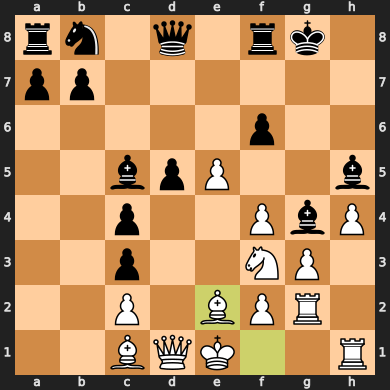

value: -335
Wall time: 1min 37s


In [17]:
%%time
board,move = perform_move(chess.Board("rn1q1rk1/pp6/5p2/2bpP2b/2p2PbP/2p2NP1/2P2PR1/2BQKB1R w K - 0 1"),5)
assert str(move) == "f1e2"

# Tests for the computation depth

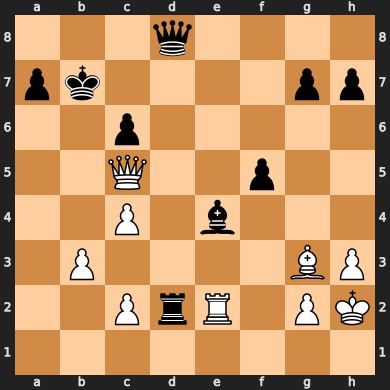

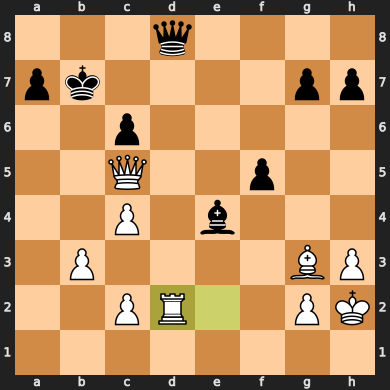

value: 15
Wall time: 738 ms


In [18]:
%%time
board,move = perform_move(chess.Board("3q4/pk4pp/2p5/2Q2p2/2P1b3/1P4BP/2PrR1PK/8 w - - 0 1"),2, True)
assert not str(move) == "c5b4"

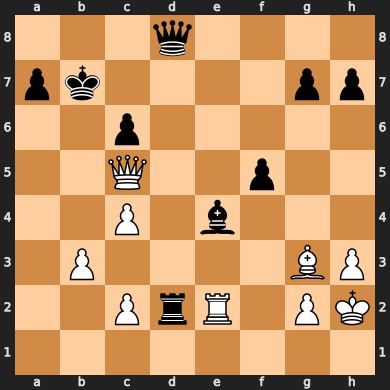

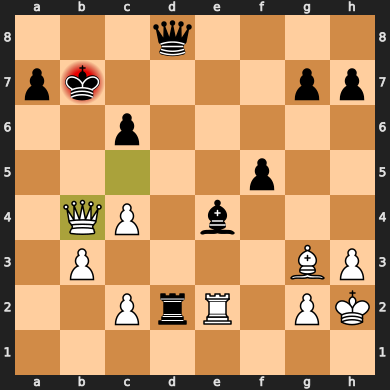

value: 10
Wall time: 19.8 s


In [19]:
%%time
# Same board as above, higher depth
board,move = perform_move(chess.Board("3q4/pk4pp/2p5/2Q2p2/2P1b3/1P4BP/2PrR1PK/8 w - - 0 1"),4, True)
assert str(move) == "c5b4"

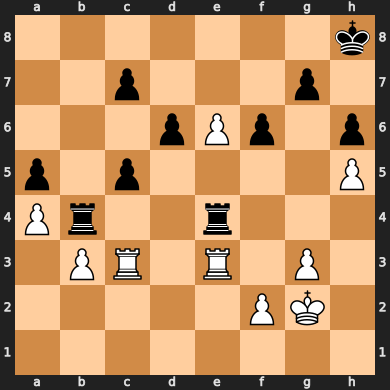

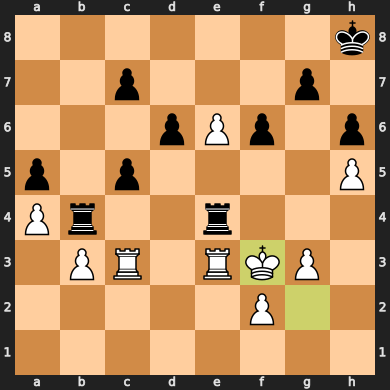

value: -105
Wall time: 13.8 s


In [20]:
%%time
board,move = perform_move(chess.Board("7k/2p3p1/3pPp1p/p1p4P/Pr2r3/1PR1R1P1/5PK1/8 w - - 0 1"),4, True)
assert not str(move) == "e6e7"

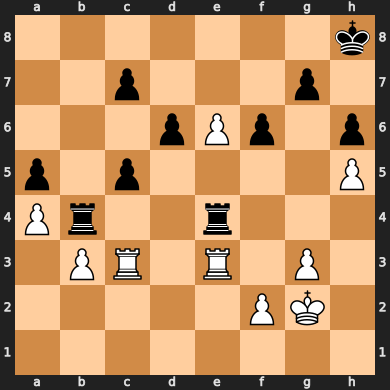

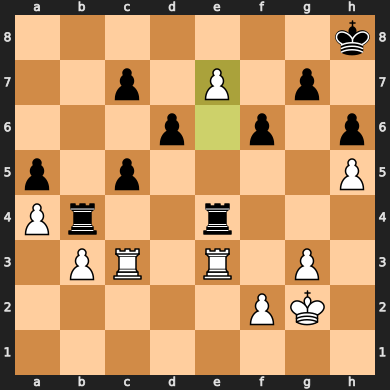

value: 410
Wall time: 38.6 s


In [21]:
%%time
# Same board as above, higher depth
board,move = perform_move(chess.Board("7k/2p3p1/3pPp1p/p1p4P/Pr2r3/1PR1R1P1/5PK1/8 w - - 0 1"),5, True)
assert str(move) == "e6e7"

# Tests for the evaluation function

This is a helper function which is executed for every test. It gets a board, the testes piece type, the table which defines the evaluation and the expected value for that type. It then shows the board and validates the expected value. The test is executed with reversed colors again to test for the inverted result. The table for the evaluation can not be fetched from the piece, because the king has different values in different stages of the game.

In [22]:
def test_evaluation_for_piece(board,piece_type,TABLE,expected_value):
    display(board)
    
    ## Test for White
    white_pieces = board.pieces(piece_type, chess.WHITE)
    black_pieces = board.pieces(piece_type, chess.BLACK)
    white_val = piece_square_tables(TABLE, white_pieces, black_pieces, chess.WHITE)
    print(f"Value for white: {white_val}")
    
    ## Test for Black
    black_val = piece_square_tables(TABLE, black_pieces, white_pieces, chess.BLACK)
    print(f"Value for black: {black_val}")
    
    ## Confirm
    assert white_val == expected_value and black_val == -expected_value

### Pawn-Square Tables tests

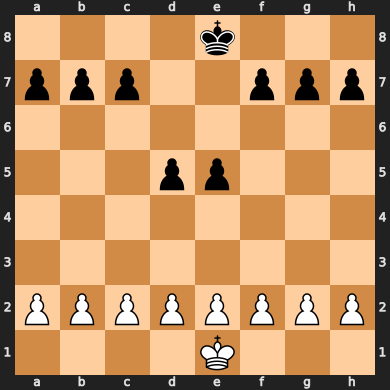

Value for white: -80
Value for black: 80


In [23]:
test_evaluation_for_piece(chess.Board("4k3/ppp2ppp/8/3pp3/8/8/PPPPPPPP/4K3 w - - 0 1"),chess.PAWN,PAWN_VALUES,-80)

### Knight-Square Tables tests

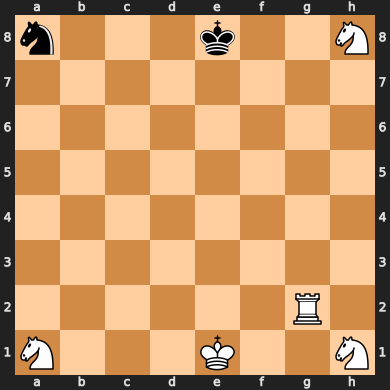

Value for white: -100
Value for black: 100


In [24]:
test_evaluation_for_piece(chess.Board("n3k2N/8/8/8/8/8/6R1/N3K2N w - - 0 1"), chess.KNIGHT, KNIGHT_VALUES,-100)

### Bishop-Square Tables tests

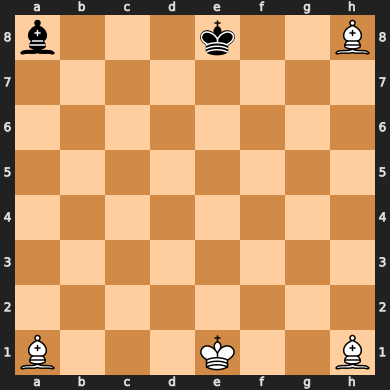

Value for white: -40
Value for black: 40


In [25]:
test_evaluation_for_piece(chess.Board("b3k2B/8/8/8/8/8/8/B3K2B w - - 0 1"),chess.BISHOP,BISHOP_VALUES,-40)

### Rook-Square Tables tests

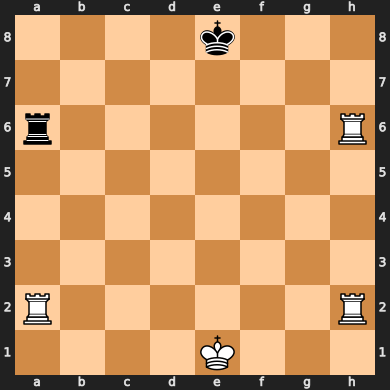

Value for white: -10
Value for black: 10


In [26]:
test_evaluation_for_piece(chess.Board("4k3/8/r6R/8/8/8/R6R/4K3 w - - 0 1"),chess.ROOK,ROOK_VALUES,-10)

### Queen-Square Tables tests

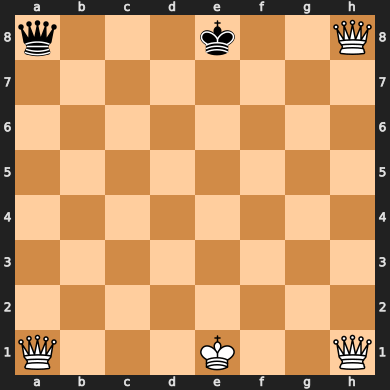

Value for white: -40
Value for black: 40


In [27]:
test_evaluation_for_piece(chess.Board("q3k2Q/8/8/8/8/8/8/Q3K2Q w - - 0 1"),chess.QUEEN,QUEEN_VALUES,-40)

### King-Square Tables tests

#### Middle Game

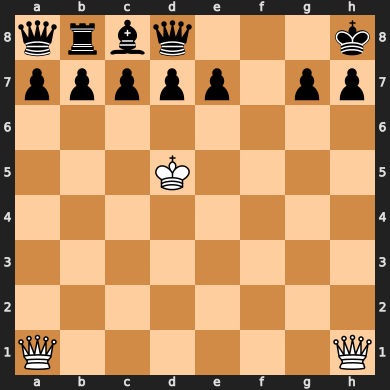

Value for white: -70
Value for black: 70


In [28]:
board = chess.Board("qrbq3k/ppppp1pp/8/3K4/8/8/8/Q6Q w - - 0 1")
test_evaluation_for_piece(board, chess.KING,KING_VALUES_MIDDLEGAME,-70)
assert not is_endgame(board)

#### Endgame

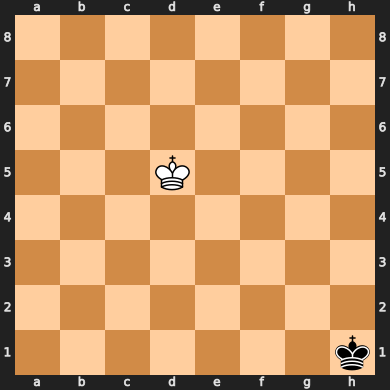

Value for white: 90
Value for black: -90


In [29]:
board = chess.Board("8/8/8/3K4/8/8/8/7k w - - 0 1")
test_evaluation_for_piece(board, chess.KING,KING_VALUES_ENDGAME,90)
assert is_endgame(board)

## Tested Times 
- Device: 2019 Macbook Pro 16' 16 GB i7

#### Override depth: 5
- With Zobrist Hash 171.34 / 162.05 Seconds
- Without Zobrist Hash 180 / 189 Seconds
#### Normal Depth
- Without Zobrist Hash: ~43.8 Seconds
- With Zobrish Hash: ~43.1 Seconds

In [30]:
print(f"Finished in {time.time() - start_time} seconds.")

Finished in 212.71861577033997 seconds.


In [31]:
print(f"Cached Boards: {len(CACHE)}")

Cached Boards: 35617
